In [1]:
import pandas as pd

In [2]:
#banker problem
gss_data = pd.read_csv("https://raw.githubusercontent.com/AllenDowney/BiteSizeBayes/master/gss_bayes.csv", index_col=0)
gss = gss_data.copy()

banker = (gss['indus10'] == 6870)
female = (gss['sex'] == 2)
male = (gss['sex'] == 1)
liberal = (gss['polviews'] <= 3)
democrat = (gss['partyid'] <= 1)




In [4]:
#probability function
def prob(A):
    """computes probability of a"""
    return A.mean()

In [5]:
#probability of individual is banker and democrat
print(prob(banker))
print(prob(female))
print(prob(democrat))
print("Banker and Democrat:")
print(prob(banker & democrat))

0.014769730168391155
0.5378575776019476
0.3662609048488537
Banker and Democrat:
0.004686548995739501


In [7]:
#conditional probability
def conditional(proposition, given):
    return(prob(proposition[given]))

In [8]:
#probability of banker given democrat
B = gss['polviews']
print(B.value_counts().sort_index())
i = 4
print(prob(B==i) * conditional(banker, B==i))

1.0     1442
2.0     5808
3.0     6243
4.0    18943
5.0     7940
6.0     7319
7.0     1595
Name: polviews, dtype: int64
0.005822682085615744


In [9]:
#basic Bayesian table design
#two bowls with equal probability of being selected at random with unequal distribution of red balls
table = pd.DataFrame(index=['bowl1', 'bowl2'])
table['prior'] = 1/2, 1/2

table['likelihood'] = 3/4, 1/2

table['unorm'] = table.prior * table.likelihood
probData = table.unorm.sum()
print(probData)

#adjusted to sum to 1
table['posterior'] = table.unorm/probData
print(table)

0.625
       prior  likelihood  unorm  posterior
bowl1    0.5        0.75  0.375        0.6
bowl2    0.5        0.50  0.250        0.4


In [10]:
from empiricaldist import Pmf

In [15]:
Pmf(1/20, hypos)

,probs
6,0.05
8,0.05
12,0.05


In [11]:
hypos = [6, 8, 12]
prior = Pmf(1/3, hypos)

In [16]:
def update_dice(pmf, data):
    """Update mpf based on new data"""
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = data > hypos
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [37]:
pmf = prior.copy()
pmf.qs

array([ 6,  8, 12], dtype=int64)

In [36]:
update_dice(pmf, 1)
print(pmf)
update_dice(pmf, 7)
print(pmf)
update_dice(pmf, 11)
print(pmf)

6     0.444444
8     0.333333
12    0.222222
Name: , dtype: float64
6     0.000000
8     0.692308
12    0.307692
Name: , dtype: float64
6     0.0
8     0.0
12    1.0
Name: , dtype: float64


Estimating Proporitions
Solve the following questions:
a coin spun 250 times lands up heads 140 times and tails 110. 

Question 1:
How probable is an event as extreme as this? 

Question 2:
What is our belief the coin is fair?

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from empiricaldist import Pmf

In [97]:
n = 2
k = 1
p = .5

binom.pmf(
    n = n,
    k = k,
    p = p
)

0.5000000000000002

In [98]:
#Genearlized problem for function build
# probability of 0, 1 or 2 heads
ks = np.arange(n+1)
ps = binom.pmf(
    n = n,
    k = ks,
    p = p
)
Pmf(ps, ks)

,probs
0,0.25
1,0.50
2,0.25


In [69]:
def make_binomial(n, p):
    """make a binomial pmf"""
    ks = np.arange(n+1)
    ps = binom.pmf(
        k = ks,
        p = p,
        n = n
    )
    return Pmf(ps, ks)

Most likely quantity of heads:
125
0.5
however getting exactly heads has only a ~5 percent likelihood:
0.050412213147309655


<AxesSubplot:>

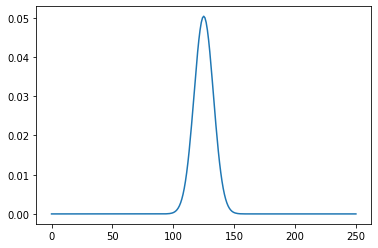

In [109]:
n = 250
p = .5

d = make_binomial(n = n, p = p)
print("Most likely quantity of heads:") 
print(d.max_prob())
print(d.max_prob() / n)
print("however getting exactly heads has only a ~5 percent likelihood:")
print(d[125])
d.plot()

In [121]:
pHeads = d.qs>=140
pTails = d.qs <= 110
pTotal = d[pHeads].sum() + d[pTails].sum()
pTotal

0.06642115124004327

Posterior probability using a uniform prior given the data observed.

0.56


<AxesSubplot:>

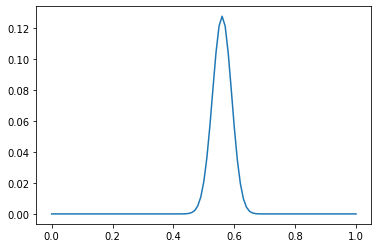

In [153]:
hypos = np.linspace(0,1,101)
prior = Pmf(1, hypos)
likelihood_heads = hypos
likelihood_tails = 1-hypos

likelihood = {
    'H': likelihood_heads,
    'T' : likelihood_tails
}

dataset = 'H' * 140 + 'T' * 110


def update_euro(pmf, dataset):
    for data in dataset:
        pmf *= likelihood[data]
    pmf.normalize()

posterior = prior.copy()
update_euro(posterior, dataset)
print(posterior.max_prob())
posterior.plot()

0.56